In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import re

In [28]:
def load_model_results(path:str,model_name:str):
    U=pd.read_csv(path,names=["training_loss","training_accuracy","test_loss","test_accuracy"])
    U["model"]=model_name
    U.dropna(inplace=True)
    U["epoch"]=[i+1 for i in range(U.shape[0])]
    return U



In [29]:
U=[]
for fileName in os.listdir("results/MNIST"):
    match=re.match("([A-Za-z0-9-+]+)-Results-MNIST.csv",fileName)
    if match:
        U.append(load_model_results(f"results/MNIST/{fileName}",match.group(1)))

results=pd.concat(U,axis=0,ignore_index=True)
results.dropna(inplace=True)

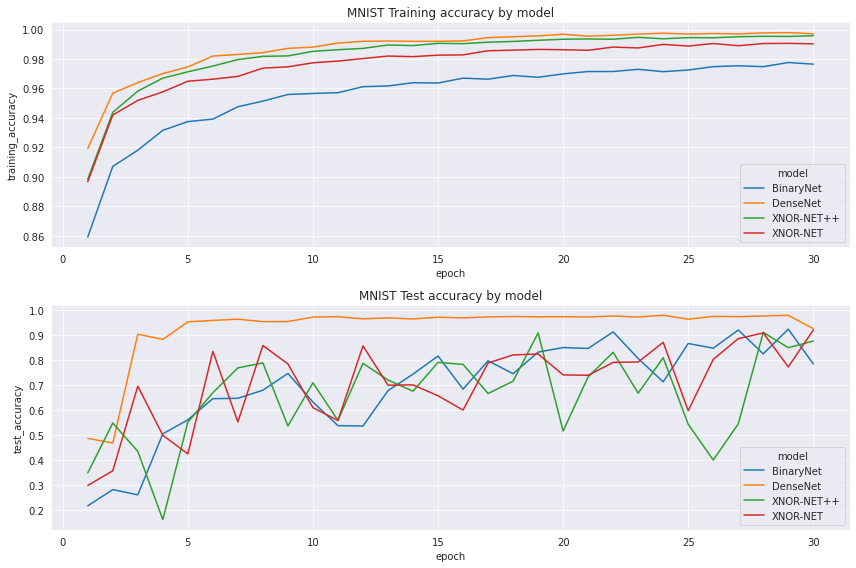

In [30]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
sns.lineplot(data=results,x="epoch",y="training_accuracy",hue="model",ax=ax1)
ax1.set_title("MNIST Training accuracy by model")
sns.lineplot(data=results,x="epoch",y="test_accuracy",hue="model",ax=ax2)
ax2.set_title("MNIST Test accuracy by model")
fig.tight_layout()
fig.savefig("local/MNIST.svg")

In [34]:
def load_noisy_model(path:str,model_name:str):
    U=pd.read_json(path)
    U["model"]=model_name
    U["epoch"]=[i+1 for i in range(U.shape[0])]
    U.rename({"loss":"training_loss","accuracy":"training_accuracy","val_loss":"test_loss","val_accuracy":"test_accuracy"},inplace=True,axis=1)
    return U
U=[]
for fileName in os.listdir("local"):
    match=re.match("([A-Za-z0-9-+]+)-MNIST-Noise.json",fileName)
    if match:
        U.append(load_noisy_model(f"local/{fileName}",match.group(1)))
results_with_noise=pd.concat([results[results["model"]=="DenseNet"],*U],ignore_index=True)

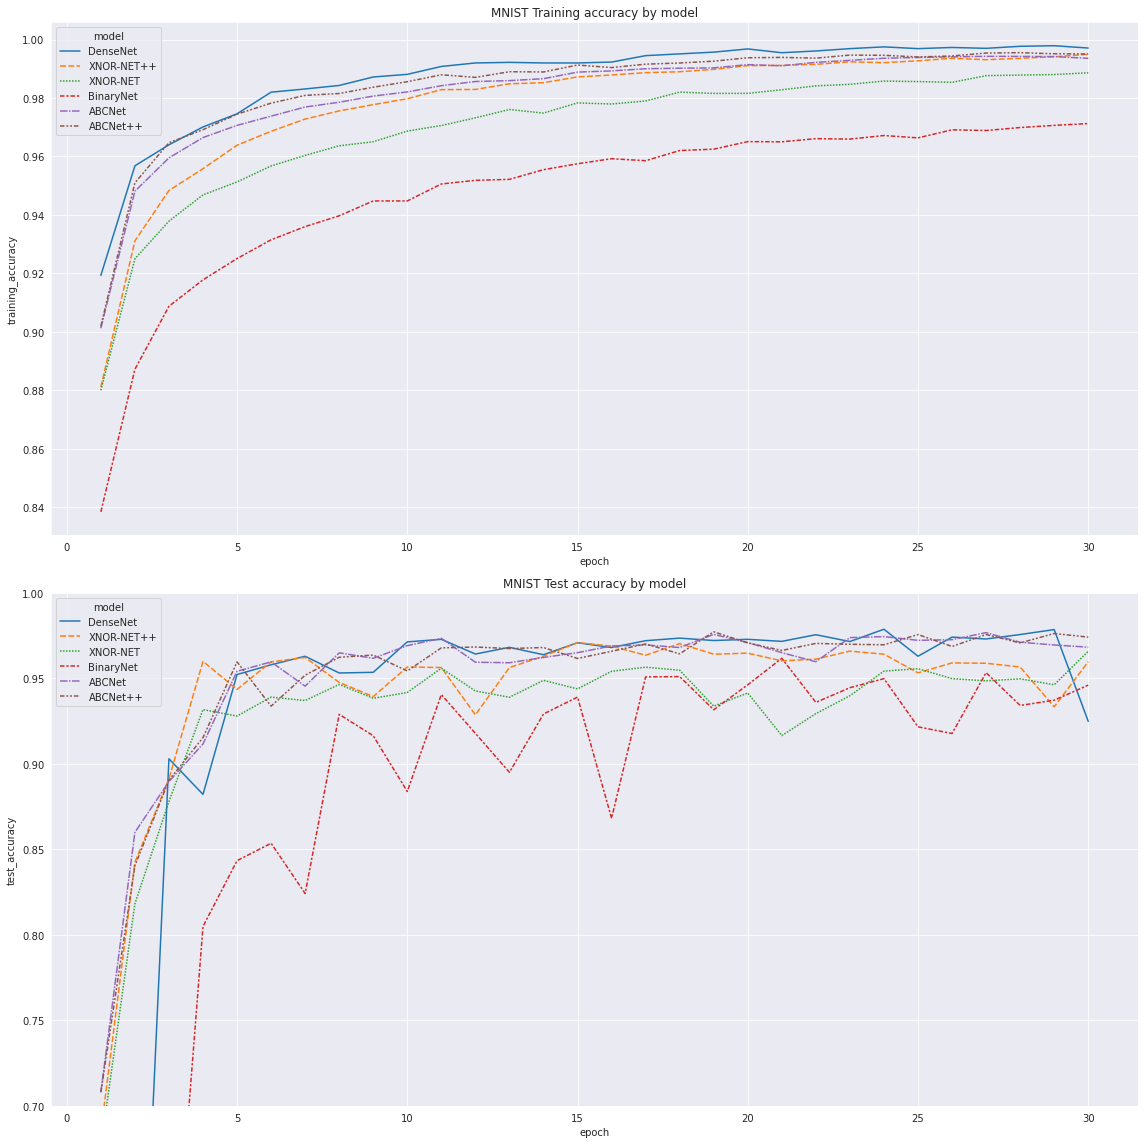

In [39]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,16))
sns.lineplot(data=results_with_noise,x="epoch",y="training_accuracy",hue="model",style="model",ax=ax1)
ax1.set_title("MNIST Training accuracy by model")
sns.lineplot(data=results_with_noise,x="epoch",y="test_accuracy",hue="model",style="model",ax=ax2)
ax2.set_title("MNIST Test accuracy by model")
ax2.set(ylim=(.70,1))
fig.tight_layout()
fig.savefig("local/MNIST.png")